In [3]:
import pandas as pd

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [4]:
df = pd.read_csv("us-counties.csv")
df['date'] = df['date'].apply(pd.to_datetime)

#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [5]:
top_counties = df.groupby('fips').max().sort_values('cases', ascending = False)['county'].tolist()
df_top_ten_counties = df[df['county'].isin(top_counties[0:10])]

df_top_ten_counties.head()

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0
11,2020-01-26,Cook,Illinois,17031.0,1,0.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [6]:
top_counties = df.groupby('state').max().sort_values('cases', ascending = False).reset_index()['state'].tolist()
df_top_five_states = df[df['state'].isin(top_counties[0:5])]

df_top_five_states.head()

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [7]:
df_incidence = df_top_ten_counties.sort_values(['fips', 'date']).reset_index()
df_incidence['incidence'] = 0

for i in range(df_incidence.shape[0]):
    if (i != 0):
        if (df_incidence['fips'][i] == df_incidence['fips'][i-1]):
            incidence_i = df_incidence['cases'][i] - df_incidence['cases'][i-1]
            
            if (incidence_i >= 0):
                df_incidence['incidence'][i] = incidence_i
            

df_incidence.groupby('fips').max().head()

/var/folders/6j/9qz49mv9637bsngvd04d4pf00000gp/T/ipykernel_75907/3799030471.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidence['incidence'][i] = incidence_i


,index,date,county,state,cases,deaths,incidence
fips,,,,,,,
1047.0,1777647,2021-10-03,Dallas,Alabama,4760,190.0,105
4013.0,1777727,2021-10-03,Maricopa,Arizona,700319,11558.0,11761
5039.0,1777754,2021-10-03,Dallas,Arkansas,1122,18.0,22
6037.0,1777829,2021-10-03,Los Angeles,California,1463743,26153.0,29174
6065.0,1777843,2021-10-03,Riverside,California,363950,5004.0,8341


#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [8]:
df_incidence.groupby('fips').max().sort_values('incidence', ascending = False)

,index,date,county,state,cases,deaths,incidence
fips,,,,,,,
6037.0,1777829,2021-10-03,Los Angeles,California,1463743,26153.0,29174
12086.0,1777989,2021-10-03,Miami-Dade,Florida,661638,8504.0,21655
6073.0,1777847,2021-10-03,San Diego,California,373289,4078.0,15453
12011.0,1777952,2021-10-03,Broward,Florida,349793,4522.0,14666
48201.0,1780350,2021-10-03,Harris,Texas,558618,8414.0,14129
4013.0,1777727,2021-10-03,Maricopa,Arizona,700319,11558.0,11761
6065.0,1777843,2021-10-03,Riverside,California,363950,5004.0,8341
6071.0,1777846,2021-10-03,San Bernardino,California,351963,5545.0,8026
17031.0,1778241,2021-10-03,Cook,Illinois,620602,11603.0,6697


#### Question 5: Plot an incidence curve for the County with the highest peak.

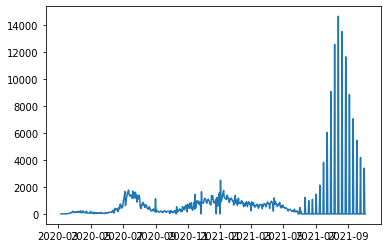

In [9]:
import matplotlib.pyplot as plt

df_highest_peak_county = df_incidence[df_incidence['county'] == 'Broward']
dates, incidence = df_highest_peak_county['date'].tolist(), df_highest_peak_county['incidence'].tolist()

plt.plot(dates, incidence)



#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

<BarContainer object of 17 artists>

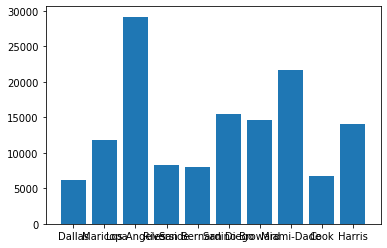

In [12]:
df_max_incidence = df_incidence.groupby('fips').max()
dates, incidence = df_max_incidence['county'].tolist(), df_max_incidence['incidence'].tolist()

plt.bar(dates, incidence)
